In [81]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [251]:
#Reading the Data using pandas library
Data_1 = pd.read_csv("/Users/vamsi_5/Downloads/nyc-rolling-sales 2.csv")

In [252]:
Data_1.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,7/19/17 0:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,12/14/16 0:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,12/9/16 0:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/16 0:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/16 0:00


In [253]:
#No of rows in the data.
len(Data_1)

84548

In [254]:
#Data types of all the columns
Data_1.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

## Data Cleaning

In [255]:
#Dropping all the duplicate rows
Data_2 = Data_1.drop_duplicates(keep=False, inplace=False)
len(Data_2)


83102

In [256]:
#Dropping the columns, Easement is blank and apartment number wouldn't make much contribution to the sales prediction.
Data_2 = Data_1.drop(['EASE-MENT', 'APARTMENT NUMBER'],axis=1)

In [257]:
Data_2.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,7/19/17 0:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,12/14/16 0:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,12/9/16 0:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,9/23/16 0:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,11/17/16 0:00


In [258]:
#Removing the blank values in these two columns and converting the string value to an integer.
Data_2= Data_2[Data_2['LAND SQUARE FEET'] != ' -  ']
Data_2= Data_2[Data_2['GROSS SQUARE FEET'] != ' -  ']

In [259]:
Data_2['LAND SQUARE FEET'] = Data_2['LAND SQUARE FEET'].apply(lambda x: int(x))
Data_2['GROSS SQUARE FEET'] = Data_2['GROSS SQUARE FEET'].apply(lambda x: int(x))

In [260]:
# Keeping all the null values of the sale price in a new data frame 
Train_val_Data = Data_2[Data_2['SALE PRICE']!=' -  ']
Test_Data = Data_2[Data_2['SALE PRICE']==' -  ']

In [261]:
#Converting the string type to an integer
Train_val_Data['SALE PRICE'] = Train_val_Data['SALE PRICE'].astype(int)

In [262]:
Train_val_Data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,7/19/17 0:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,9/23/16 0:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,11/17/16 0:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750,4226,1920,2,C4,3192840,9/23/16 0:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489,18523,1920,2,D9,16232000,11/7/16 0:00


In [263]:
len(Train_val_Data)

48244

## Outliers Detection and Removal

In [264]:
Train_val_Data = Train_val_Data[Train_val_Data['SALE PRICE']!=0]

In [265]:
#Here We can see that for the sales price the standard deviation is greater than the mean. Implicates there outliers in the data
Train_val_Data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,38016.000000,38016.000000,38016.000000,38016.000000,38016.000000,38016.000000,38016.000000,3.801600e+04,3.801600e+04,38016.000000,38016.000000,3.801600e+04
mean,3.368687,5126.782986,223.421007,10936.869608,2.476641,0.255156,2.738005,3.434150e+03,3.570919e+03,1852.323706,1.411642,1.463566e+06
std,0.964563,3634.150093,479.722727,1023.812461,17.687021,12.312669,21.675325,3.492802e+04,3.007934e+04,417.872154,0.743727,1.508182e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000e+00
25%,3.000000,2135.000000,21.000000,10466.000000,1.000000,0.000000,1.000000,1.400000e+03,8.820000e+02,1920.000000,1.000000,3.850000e+05
50%,3.000000,4665.000000,44.000000,11217.000000,1.000000,0.000000,1.000000,2.200000e+03,1.552000e+03,1931.000000,1.000000,6.000000e+05
75%,4.000000,7273.000000,93.000000,11358.000000,2.000000,0.000000,2.000000,3.275000e+03,2.352000e+03,1962.000000,2.000000,9.500000e+05
max,5.000000,16319.000000,7501.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [266]:
#Calculating the 3rd percentile
np.percentile(Train_val_Data['SALE PRICE'],3)

10725.000000000022

In [267]:
#Eliminating all the values which are less than the 3rd percentile, A Real estate property in the NYC cannot be less than this.
Train_val_Data = Train_val_Data[Train_val_Data['SALE PRICE'] > 10725]

In [280]:
Train_val_Data['Sale_Log']= np.log(Train_val_Data['SALE PRICE'])

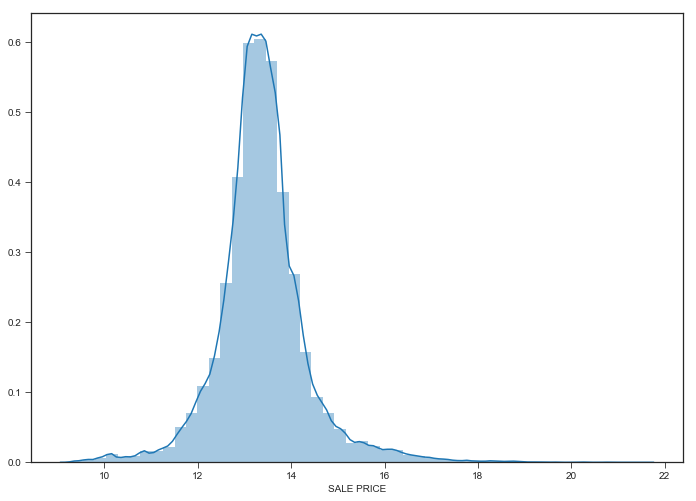

In [277]:
#Tranforming the data(Log Transformation) and looking at the distribution. After removal of the outliers, we can see the normal distribution 
#of the variable 'Sale price'. 

sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.distplot(np.log(Train_val_Data['SALE PRICE']))

## Exploratory Analysis


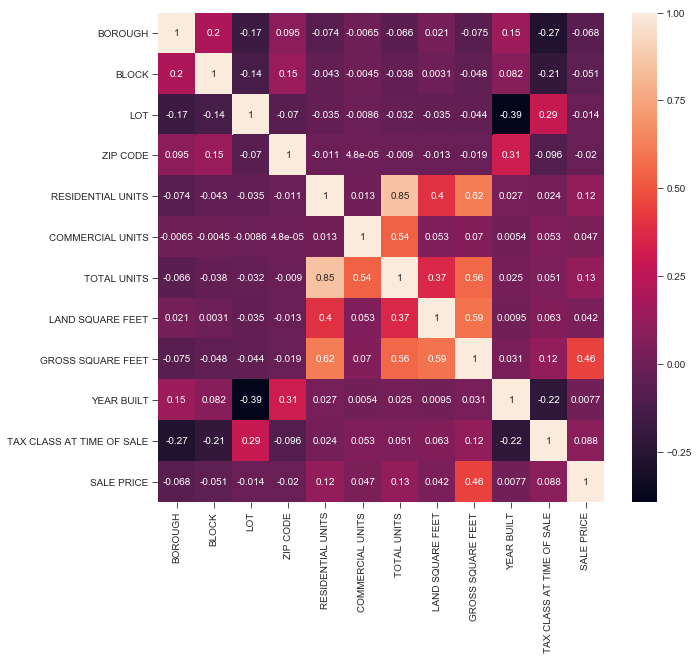

In [156]:
#Correlation plot among all the variables
#From this plot, we can tell that 'LOT','zip code' and 'year built' are poorly realted with the sale price, We can eliminate them


plt.figure(figsize=(10,9))
sns.heatmap(Train_val_Data.corr(),annot=True)

In [281]:
#File written as CSV, Used in "R Studio" for feature engineering. (Using Backward Subset Selection method)
Train_val_Data.to_csv('Train_Val.csv') 

## Data PreProcessing

In [289]:
Train_val_Data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Sale_Log'],
      dtype='object')

In [290]:
#Converting categorical data into labelled data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Train_val_Data.loc[:,'BUILDING CLASS CATEGORY'] = le.fit_transform(Train_val_Data.loc[:,'BUILDING CLASS CATEGORY'])
Train_val_Data.loc[:,'TAX CLASS AT PRESENT'] = le.fit_transform(Train_val_Data.loc[:,'TAX CLASS AT PRESENT'])
Train_val_Data.loc[:,'ZIP CODE'] = le.fit_transform(Train_val_Data.loc[:,'ZIP CODE'])
Train_val_Data.loc[:,'BUILDING CLASS AT TIME OF SALE'] = le.fit_transform(Train_val_Data.loc[:,'BUILDING CLASS AT TIME OF SALE'])

In [292]:
Train_val_Data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Sale_Log
0,1,ALPHABET CITY,6,6,392,6,C2,153 AVENUE B,8,5,0,5,1633,6440,1900,2,15,6625000,7/19/17 0:00,15.706361
3,1,ALPHABET CITY,6,7,402,21,C4,154 EAST 7TH STREET,8,10,0,10,2272,6794,1913,2,17,3936272,9/23/16 0:00,15.185745
4,1,ALPHABET CITY,6,6,404,55,C2,301 EAST 10TH STREET,8,6,0,6,2369,4615,1900,2,15,8000000,11/17/16 0:00,15.894952
6,1,ALPHABET CITY,6,7,406,32,C4,210 AVENUE B,8,8,0,8,1750,4226,1920,2,17,3192840,9/23/16 0:00,14.976421
9,1,ALPHABET CITY,7,5,387,153,D9,629 EAST 5TH STREET,8,24,0,24,4489,18523,1920,2,32,16232000,11/7/16 0:00,16.602495


## Data Modeling


In [294]:
from sklearn.model_selection import train_test_split

In [295]:
X = Train_val_Data[[ 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
        'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE']]
y = Train_val_Data['Sale_Log']

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [297]:
#Linear Regression
#1)Residual vs Fitted - No pattern evident
#2)Normal QQ plot - The plot is not normal, even after log transformations it was not completely normally distributed
#3)Homoskedacity is evident.
#4)Checked multi-colinearity by using correlation plot. Removed highly correlated variables.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [298]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [299]:
predictions = lm.predict( X_test)

In [301]:
predictions = np.exp(predictions)

In [306]:
#Mean square error is quite high, the relationship between Y and other variables is not linear. 
#To capture the non-linearaity, I'm going with ensemble models
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(np.exp(y_test), predictions))
print('MSE:', metrics.mean_squared_error(np.exp(y_test), predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), predictions)))

MAE: 1.5229016179906342e+18
MSE: 2.5655547006171016e+40
RMSE: 1.601734903352331e+20


In [323]:
#Random forest regressor to capture the non-linearity in the data.

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestRegressor(max_depth=5,min_samples_leaf=50,n_estimators=500)
RF.fit(X_train,y_train)
pred2 = RF.predict(X_test)
pred2=np.exp(pred5)
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test),pred5)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(np.exp(y_test),pred5)))

RMSE: 8446609.32835297
MAE: 930.7572900887693


In [329]:
#Neural Network. To capture the non-linearity in the model which was not explained by simple models.
from sklearn.neural_network import MLPRegressor
NN = MLPRegressor(solver='sgd',learning_rate_init=0.0001,max_iter=200)
NN.fit(X_train,y_train)
pred3=NN.predict(X_test)
pred3 = np.exp(pred7)
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test),pred7)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(np.exp(y_test),pred7)))

RMSE: 1303547713.8371522
MAE: 36104.247140218395
